# Exploratory Data Analysis

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [5]:
from pycaret.regression import *

In [6]:
def plot_distribution(dataset):
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(20,30))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    rows = math.ceil(float(dataset.shape[1]) / 3)
    
    for i, column in enumerate(dataset.columns):
        
        ax = fig.add_subplot(rows, 3, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:
            
            if(len(dataset[column].unique()) > 10):
               
                most_frequent = dataset[column].value_counts().sort_values(ascending=False)[:10].index.tolist()
                g = sns.countplot(y=column, data=dataset[dataset[column].isin(most_frequent)])
                ax.set_title(column + " (10 out of " + str(len(dataset[column].unique())) + " most frequent values)")
            else:
                g = sns.countplot(y=column, data=dataset)
            
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

### Loading the data into the data frame.

In [7]:
# utf-8 encoding:
# df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="utf-8")

df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="unicode_escape")

### Replace '?' with null values and keep rows where Viability is not null

In [8]:
df = df.replace('?', np.nan)
df = df[df['Viability'].notna()]

### Replace floating-point comma with dot and make sure numerical columns have numeric data type

In [9]:
df["core_size_nm"] = df["core_size_nm"].str.replace(',','.')
df["core_size_nm"] = pd.to_numeric(df["core_size_nm"])

df["hydro_size_nm"] = df["hydro_size_nm"].str.replace(',','.')
df["hydro_size_nm"] = pd.to_numeric(df["hydro_size_nm"])

df["Surf_charge_mV"] = df["Surf_charge_mV"].str.replace(',','.')
df["Surf_charge_mV"] = pd.to_numeric(df["Surf_charge_mV"])

df["Surface_area_m2_g"] = df["Surface_area_m2_g"].str.replace(',','.')
df["Surface_area_m2_g"] = pd.to_numeric(df["Surface_area_m2_g"])

df["Dose_microg_mL"] = df["Dose_microg_mL"].str.replace(',','.')
df["Dose_microg_mL"] = pd.to_numeric(df["Dose_microg_mL"])

df["Viability"] = df["Viability"].str.replace(',','.')
df["Viability"] = pd.to_numeric(df["Viability"])

print("Duration_h: " + str(pd.api.types.is_numeric_dtype(df['Duration_h'])))
print("core_size_nm: " + str(pd.api.types.is_numeric_dtype(df['core_size_nm'])))
print("hydro_size_nm: " + str(pd.api.types.is_numeric_dtype(df['hydro_size_nm'])))
print("Surf_charge_mV: " + str(pd.api.types.is_numeric_dtype(df['Surf_charge_mV'])))
print("Surface_area_m2_g: " + str(pd.api.types.is_numeric_dtype(df['Surface_area_m2_g'])))
print("Dose_microg_mL: " + str(pd.api.types.is_numeric_dtype(df['Dose_microg_mL'])))
print("Viability: " + str(pd.api.types.is_numeric_dtype(df['Viability'])))

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Viability: True


### Cheack shape, head, tail and a sample of the dataframe

In [10]:
df.shape

(11591, 19)

In [11]:
df.head(n=5)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability
0,Au,None,39.0,NaN,NaN,NaN,Rod,0.3,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,84.99
1,Au,None,39.0,NaN,NaN,NaN,Rod,0.6,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,86.85
2,Au,None,39.0,NaN,NaN,NaN,Rod,1.2,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,85.48
3,Au,None,39.0,NaN,NaN,NaN,Rod,2.5,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,70.72
4,Au,None,39.0,NaN,NaN,NaN,Rod,5.0,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,54.09


### Check data types

In [12]:
df.dtypes

NP_type               object
Coating               object
core_size_nm         float64
hydro_size_nm        float64
Surf_charge_mV       float64
Surface_area_m2_g    float64
shape                 object
Dose_microg_mL       float64
Duration_h           float64
Cell_name             object
Cell_species          object
cell_Organ            object
Cell_morphology       object
Cell_age              object
cell_type             object
sex                   object
Assay                 object
Test_indicator        object
Viability            float64
dtype: object

### Describe dataframe

#### Describe numerical columns

In [13]:
df.describe()

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,Viability
count,10784.000000,2834.000000,5377.000000,850.000000,11369.000000,11255.000000,11591.000000
mean,55.983907,321.677421,-6.299405,100.796365,88.920945,34.044958,72.769054
std,93.620772,307.192574,28.965272,103.692893,527.034851,34.059479,32.557049
min,0.840000,8.700000,-158.000000,7.000000,0.000000,0.000000,-58.900000
25%,6.000000,120.000000,-26.960000,22.000000,0.010000,24.000000,51.290000
50%,21.000000,239.000000,-11.000000,57.000000,1.311929,24.000000,83.240000
75%,60.000000,404.000000,12.100000,177.570000,50.000000,48.000000,96.970000
max,900.000000,2029.000000,256.000000,576.230000,15000.000000,672.000000,404.810000


#### Describe categorical columns

In [14]:
df.describe(include=["bool", "object"])

,NP_type,Coating,shape,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator
count,11591,11591,4532,11591,11591,11591,11571,10818,11489,8508,11591,11342
unique,79,151,13,285,22,65,37,5,2,2,35,17
top,CdSe,None,Sphere,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt
freq,1727,7881,3300,949,9003,2008,5821,7925,7066,5053,5066,7590


### Count missing values

In [15]:
print(df.isnull().sum())

NP_type                  0
Coating                  0
core_size_nm           807
hydro_size_nm         8757
Surf_charge_mV        6214
Surface_area_m2_g    10741
shape                 7059
Dose_microg_mL         222
Duration_h             336
Cell_name                0
Cell_species             0
cell_Organ               0
Cell_morphology         20
Cell_age               773
cell_type              102
sex                   3083
Assay                    0
Test_indicator         249
Viability                0
dtype: int64


### Remove duplicate rows

In [16]:
data_df = df.drop_duplicates()

In [17]:
data_df.shape

(11423, 19)

### Plot features (categorical and numerical)

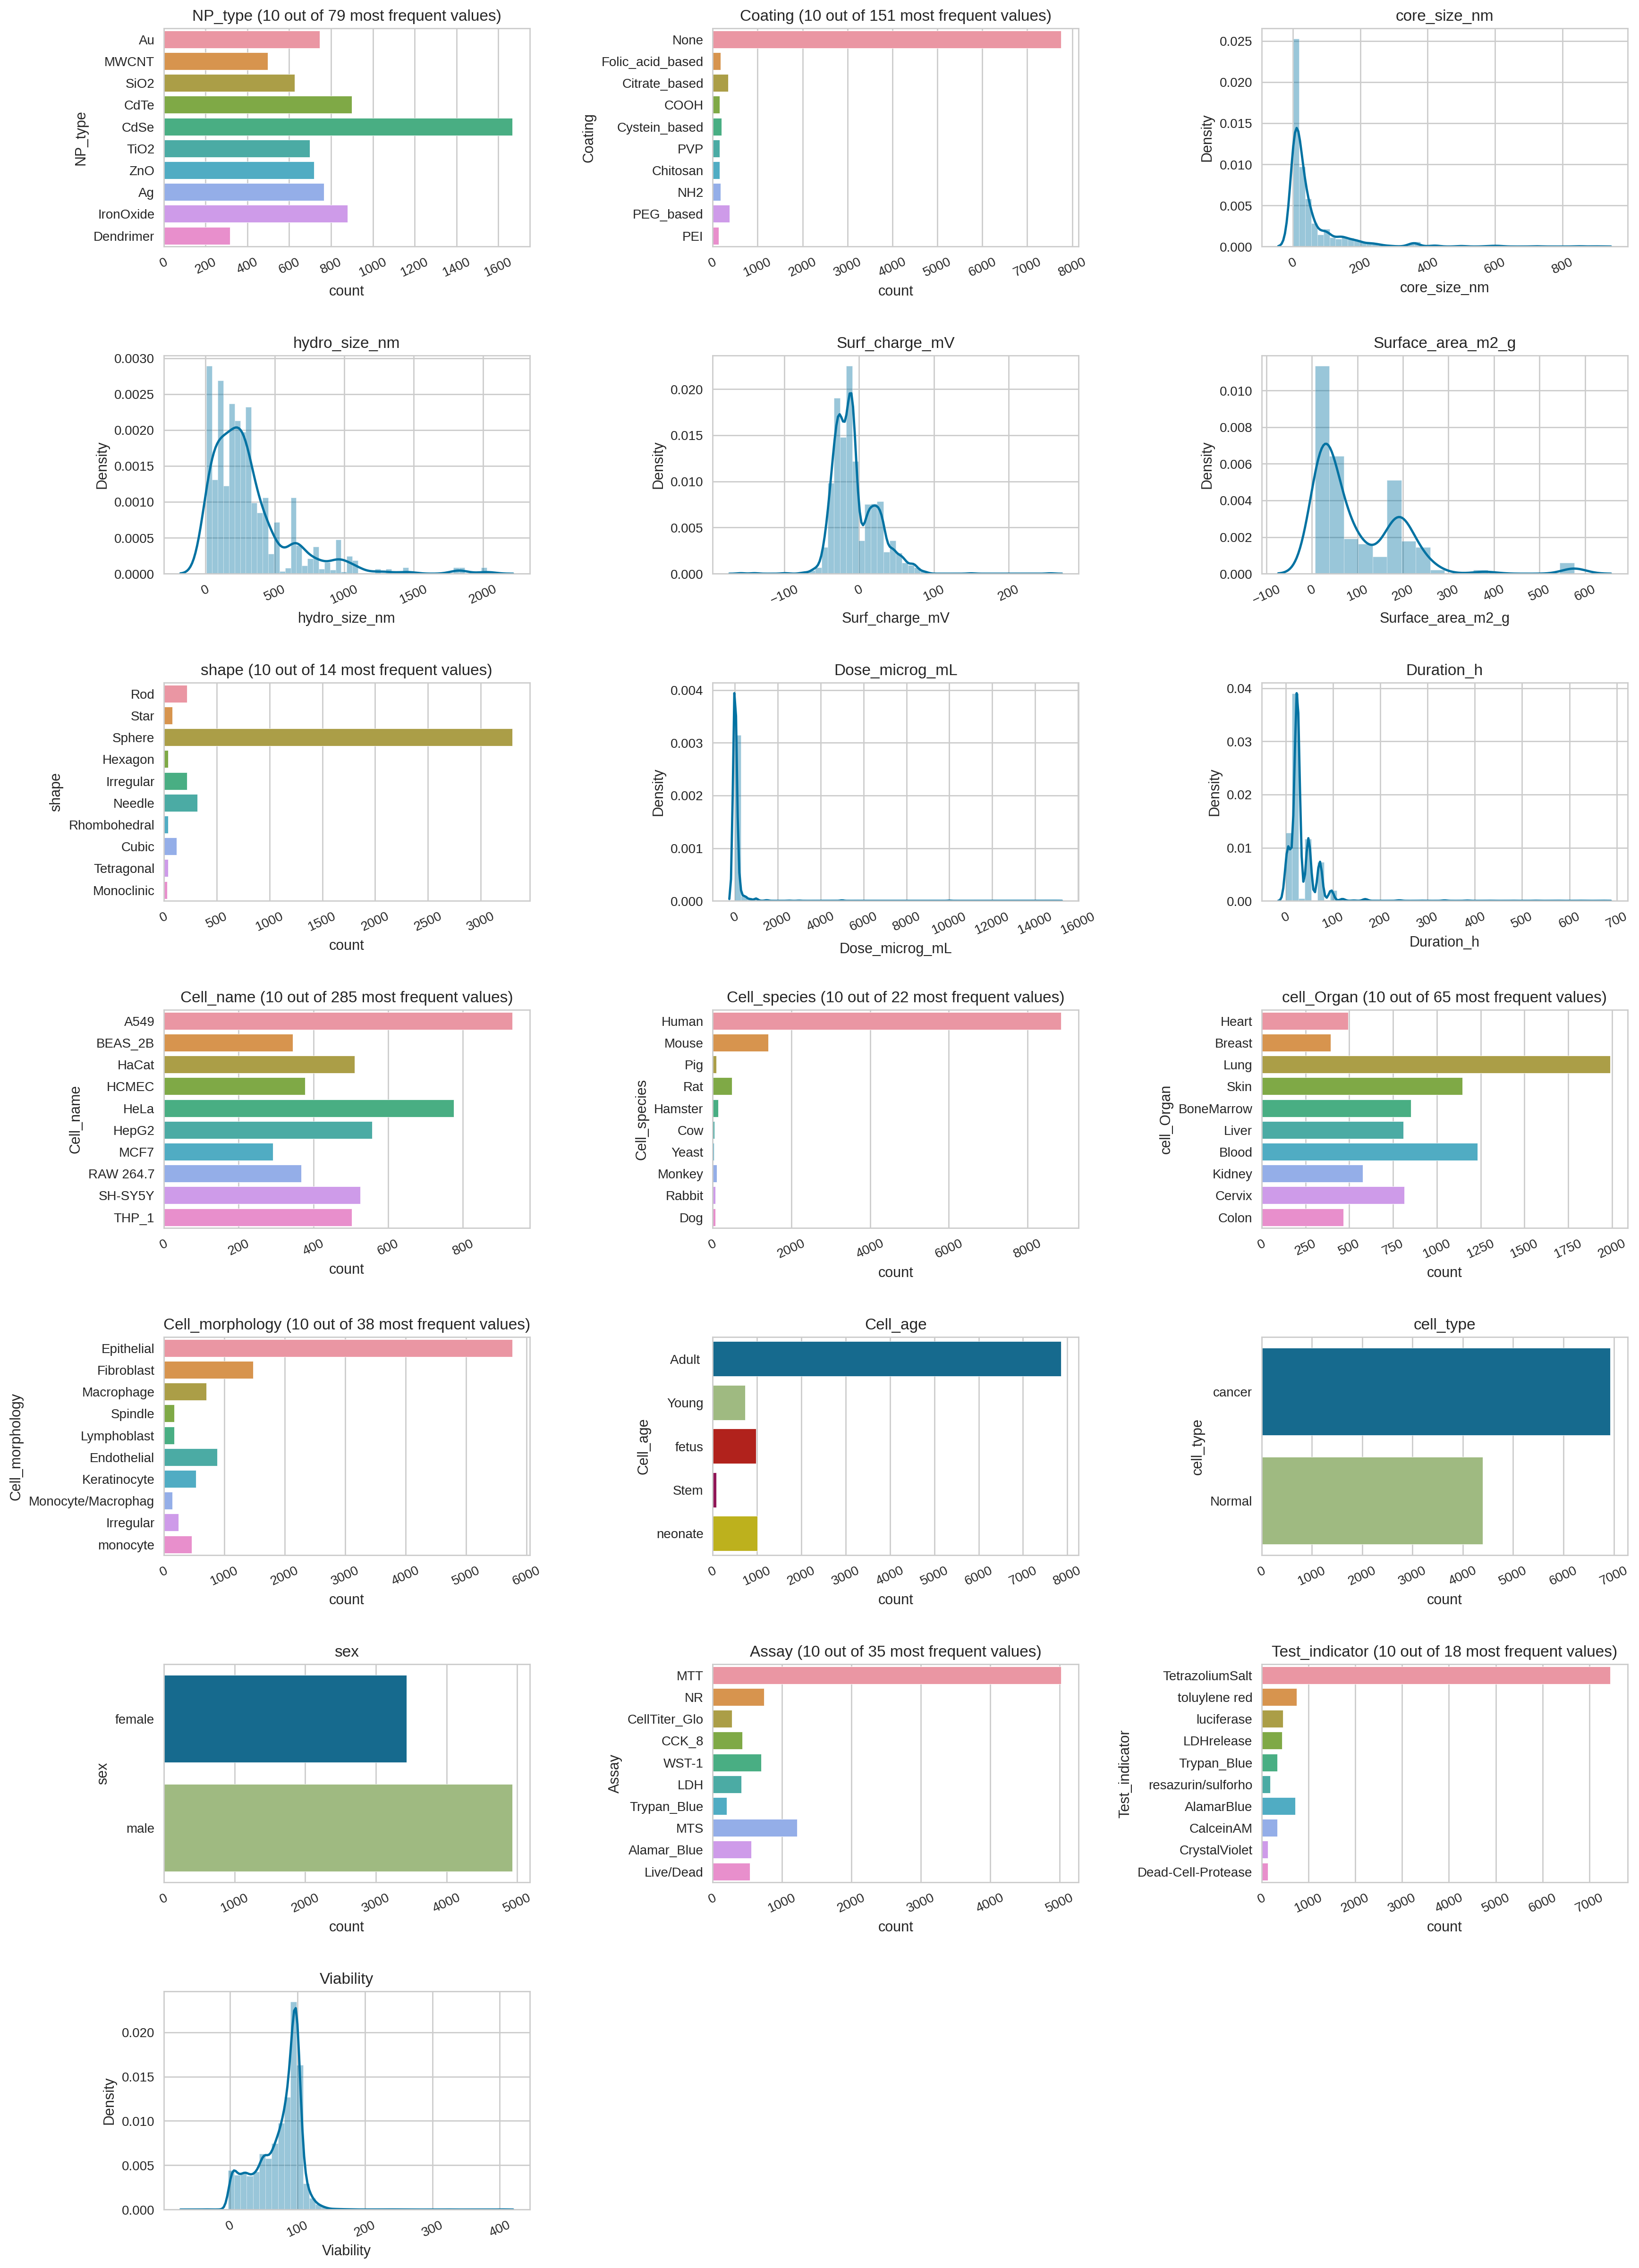

In [18]:
plot_distribution(data_df)

## Group NP types

In [19]:
data_df["nanomaterial_group"] = data_df["NP_type"]

In [20]:
metal_oxides = ["SiO2", "MgO", "TiO2", "ZnO", "Bi2O3", "CuO", "Cu2O", "Fe3O4", "IronOxide", "MnO", "ZrO2", "Co3O4", "CoO",
          "Mn2O3", "Ni2O3", "Al2O3", "Fe2O3", "In2O3", "La2O3", "NiO", "Sb2O3", "SnO2", "Y2O3", "CeO2", "CdO", "Dy2O3", 
          "Er2O3", "Eu2O3", "Gd2O3", "HfO2", "MnO2", "Nd2O3", "Sm2O3", "Yb2O3", "Cr2O3"]
carbon = ["Graphite", "Diamond", "C60", "C70", "Carbon"]
nanotubes = ["Nanotubes", "SWCNT", "MWCNT"]
quantum_dots = ['CdSe', 'CdTe', 'CdSeTe', 'CdZnS', 'CdS', 'CdTeS', 'CdHgTe', 'CdSeS', 'CdGeS', 'CdGdTe', 'CdZnSeS', 'QD', 'QDs']

In [21]:
combined_groups = list(metal_oxides + carbon + nanotubes + quantum_dots)

In [22]:
data_df.loc[data_df["NP_type"].isin(metal_oxides), "nanomaterial_group"] = "meta_oxide" 

In [23]:
data_df.loc[data_df["NP_type"].isin(carbon), "nanomaterial_group"] = "carbon" 

In [24]:
data_df.loc[data_df["NP_type"].isin(nanotubes), "nanomaterial_group"] = "nanotubes" 

In [25]:
data_df.loc[data_df["NP_type"].isin(quantum_dots), "nanomaterial_group"] = "quantum_dots" 

In [26]:
data_df.loc[~data_df["NP_type"].isin(combined_groups), "nanomaterial_group"] = "other" 

In [27]:
data_df['NP_type'][~data_df['NP_type'].isin(combined_groups)].unique()

array(['Au', 'Ag', 'Chitosan', 'Ni', 'PLGA', 'Polystyrene', 'SLN',
       'Hydroxyapatite', 'Mo', 'Alginate', 'Dendrimer', 'Liposomes',
       'WO3', 'Co', 'Pt', 'CuS', 'Bi', 'PTFE-PMMA', 'Cu', 'EudragitRL',
       'Se', 'Cr', 'Ti'], dtype=object)

In [28]:
data_df.sample(n=20)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability,nanomaterial_group
3344,Dendrimer,None,NaN,NaN,NaN,NaN,Sphere,9.239100e+00,6.0,HaCat,Human,Skin,Keratinocyte,Adult,Normal,male,MTT,TetrazoliumSalt,88.24,other
3783,IronOxide,None,42.00,957.0,NaN,NaN,NaN,6.905320e-12,24.0,HCMEC,Human,Heart,Endothelial,Adult,Normal,NaN,LDH,LDHrelease,98.16,meta_oxide
287,Ag,None,65.00,NaN,-30.000,NaN,Sphere,5.000000e+01,48.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,74.29,other
9927,IronOxide,OleicAcid,10.90,183.6,-28.500,NaN,Sphere,7.500000e+01,3.0,SH­SY5Y,Human,BoneMarrow,Epithelial,Young,cancer,female,MTT,TetrazoliumSalt,94.62,meta_oxide
6622,SiO2,None,21.80,NaN,NaN,NaN,Sphere,2.500000e+01,24.0,HUVEC,Human,Umbilical,Endothelial,fetus,Normal,NaN,CVS,CrystalViolet,36.46,meta_oxide
9296,CdTe,None,5.30,NaN,NaN,NaN,NaN,2.000000e-02,8.0,Raji,Human,Lymph,Lymphocyte,Adult,cancer,male,MTT,TetrazoliumSalt,91.20,quantum_dots
8991,CdTe,None,4.50,NaN,NaN,NaN,NaN,1.000000e-01,24.0,PC12,Rat,Adrenal-gland,Irregular,Adult,cancer,male,APO_BrdU_TUNEL,BrdUTP,38.00,quantum_dots
10281,Ag,None,16.70,NaN,NaN,NaN,Sphere,5.000000e+01,24.0,SIRC,Rabbit,Cornea,Fibroblast,Adult,Normal,NaN,MTT,TetrazoliumSalt,87.82,other
1804,Ni2O3,None,140.60,339.5,32.200,NaN,NaN,3.200000e+00,NaN,BEAS_2B,Human,Lung,Epithelial,Adult,Normal,NaN,MTS,TetrazoliumSalt,100.00,meta_oxide
6802,Chitosan,None,240.00,NaN,43.900,NaN,NaN,2.294130e-04,24.0,J774,Mouse,Blood,Monocyte/Macrophage,Adult,cancer,female,Live/Dead,CalceinAM,86.12,other


# PyCaret

In [29]:
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

## Define data preparing scenarios

In [30]:
features_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario1["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario1["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario2 = {}
scenario2["ID"] = 2
scenario2["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario2["high_cardinality_features"] = None
scenario2["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario3 = {}
scenario3["ID"] = 3
scenario3["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario3["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario3["bin_numeric_features"] = None

scenario4 = {}
scenario4["ID"] = 4
scenario4["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario4["high_cardinality_features"] = None
scenario4["bin_numeric_features"] = None

scenario5 = {}
scenario5["ID"] = 5
scenario5["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario5["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario5["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario6 = {}
scenario6["ID"] = 6
scenario6["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario6["high_cardinality_features"] = None
scenario6["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario7 = {}
scenario7["ID"] = 7
scenario7["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario7["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario7["bin_numeric_features"] = None

scenario8 = {}
scenario8["ID"] = 8
scenario8["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario8["high_cardinality_features"] = None
scenario8["bin_numeric_features"] = None

features_scenarios.append(scenario1)
features_scenarios.append(scenario2)
features_scenarios.append(scenario3)
features_scenarios.append(scenario4)
features_scenarios.append(scenario5)
features_scenarios.append(scenario6)
features_scenarios.append(scenario7)
features_scenarios.append(scenario8)


imputation_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["imputation_type"] = "simple"
scenario1["numeric_imputation"] = "median"

scenario2 = {}
scenario2["ID"] = 2
scenario2["imputation_type"] = "simple"
scenario2["numeric_imputation"] = "mean"

scenario3 = {}
scenario3["ID"] = 3
scenario3["imputation_type"] = "iterative"
scenario3["numeric_imputation"] = "mean"

imputation_scenarios.append(scenario1)
imputation_scenarios.append(scenario2)
imputation_scenarios.append(scenario3)



preprocess_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["normalize"] = True
scenario1["remove_outliers"] = True

scenario2 = {}
scenario2["ID"] = 2
scenario2["normalize"] = True
scenario2["remove_outliers"] = False

scenario3 = {}
scenario3["ID"] = 3
scenario3["normalize"] = False
scenario3["remove_outliers"] = True

scenario4 = {}
scenario4["ID"] = 4
scenario4["normalize"] = False
scenario4["remove_outliers"] = False

preprocess_scenarios.append(scenario1)
preprocess_scenarios.append(scenario2)
preprocess_scenarios.append(scenario3)
preprocess_scenarios.append(scenario4)

In [31]:
data_df.columns

Index(['NP_type', 'Coating', 'core_size_nm', 'hydro_size_nm', 'Surf_charge_mV',
       'Surface_area_m2_g', 'shape', 'Dose_microg_mL', 'Duration_h',
       'Cell_name', 'Cell_species', 'cell_Organ', 'Cell_morphology',
       'Cell_age', 'cell_type', 'sex', 'Assay', 'Test_indicator', 'Viability',
       'nanomaterial_group'],
      dtype='object')

## Run PyCaret for all the scenarios 96 in total (8 X 3 X 4)

In [31]:
i = 0
j = 0
k = 0

for features_scenario in features_scenarios:
    i = features_scenario["ID"] 
    for imputation_scenario in imputation_scenarios:
        j = imputation_scenario["ID"]
        for preprocess_scenario in preprocess_scenarios:
            k = preprocess_scenario["ID"]
                                
            print(imputation_scenario["imputation_type"])
            print(imputation_scenario["numeric_imputation"])
            print(features_scenario["ignore_features"])
            print(features_scenario["bin_numeric_features"])
            print(features_scenario["high_cardinality_features"])
            print(preprocess_scenario["normalize"])
            print(preprocess_scenario["remove_outliers"])

            stup = setup(data = data_df, target = 'Viability', 

                imputation_type = imputation_scenario["imputation_type"], #default
                numeric_imputation = imputation_scenario["numeric_imputation"], #default: mean

                categorical_imputation = "constant", #default: constant
                iterative_imputation_iters = 5, #default: 5
                numeric_iterative_imputer = "lightgbm",
                categorical_iterative_imputer = "lightgbm",

                ignore_features = features_scenario["ignore_features"],
                bin_numeric_features = features_scenario["bin_numeric_features"],
                high_cardinality_features = features_scenario["high_cardinality_features"],

                high_cardinality_method = "frequency", #default: frequency
                handle_unknown_categorical = True, #default
                unknown_categorical_method = "least_frequent", #default

                normalize = preprocess_scenario["normalize"], #default: False
                remove_outliers= preprocess_scenario["remove_outliers"], #default: False

                outliers_threshold = 0.05, #default

                transformation= False, #default
                transformation_method = 'yeo-johnson', #default
                transform_target = False, 
                combine_rare_levels = False,
                rare_level_threshold = 0.1, #default: 0.1

                remove_multicollinearity = False, #default 
                multicollinearity_threshold = 0.9, #default

                ignore_low_variance = True, 

                feature_interaction = False, 
                feature_ratio = False,
                polynomial_features = False, 
                trigonometry_features = False,

                #train_size=0.8,
                #fold=5,

                # don't change the following
                session_id = 123,
                use_gpu=False,
                log_experiment = False,
                silent=True,
                experiment_name = 'nanosafety')


            best = compare_models(exclude = ['par', 'lar', 'llar', 'en', 'lasso', 'xgboost', 'catboost',
                             'ada', 'omp', 'huber', 'br', 'ridge',
                            'dt', 'knn', 'lr'], n_select = 3)

            results_df = pull()

            results_df = results_df.reset_index(level=0)

            results_df.to_csv("output/results/" + "-".join([str(i), str(j), str(k)])+".tsv", 
                                                         index=False, encoding="utf-8", sep="\t")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,12.7977,394.8860,19.7984,0.6169,0.5247,1.1044,1.7950
et,Extra Trees Regressor,11.9495,421.7008,20.4301,0.5913,0.5096,0.8380,2.0860
lightgbm,Light Gradient Boosting Machine,15.6087,475.5389,21.7813,0.5384,0.6094,1.5095,0.0560
gbr,Gradient Boosting Regressor,20.2537,684.7855,26.1468,0.3354,0.7429,2.5039,0.4190
dummy,Dummy Regressor,25.9108,1031.3797,32.1000,-0.0016,0.8570,4.4479,0.0150


## Aggregate ML training reports from 96 experiments and order by R2 (descending)

In [48]:
results_list = os.listdir("output/results")

In [49]:
os.path.splitext(os.path.basename("output/results/"+results_list[0]))[0]

'1-1-1'

In [50]:
li = []

for result_file in results_list:
    
    scenario = os.path.splitext(os.path.basename("output/results/"+result_file))[0]
    df = pd.read_csv("output/results/"+result_file, encoding="utf-8", index_col=None, header=0, sep="\t")
    df['scenario'] = scenario
    li.append(df)

In [51]:
final_df = pd.concat(li, axis=0, ignore_index=True)
final_df = final_df.reset_index(drop=True)

print(final_df.shape)

(480, 10)


In [52]:
final_df.dtypes

index        object
Model        object
MAE         float64
MSE         float64
RMSE        float64
R2          float64
RMSLE       float64
MAPE        float64
TT (Sec)    float64
scenario     object
dtype: object

In [55]:
final_df.head()

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
0,rf,Random Forest Regressor,16.6798,585.3926,24.1718,0.4337,0.6159,1.4875,0.857,1-1-1
1,lightgbm,Light Gradient Boosting Machine,18.1629,600.8879,24.4957,0.4197,0.6614,1.7855,0.050,1-1-1
2,et,Extra Trees Regressor,17.1965,647.7993,25.4307,0.3728,0.6506,1.3538,0.570,1-1-1
3,gbr,Gradient Boosting Regressor,21.4052,760.4666,27.5546,0.2671,0.7465,2.3078,0.137,1-1-1
4,dummy,Dummy Regressor,25.9621,1039.1820,32.2167,-0.0015,0.8579,4.5400,0.015,1-1-1


In [56]:
final_df = final_df.sort_values(by=['R2'], ascending=False)

In [57]:
final_df.head(n=20)

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
460,et,Extra Trees Regressor,12.0215,387.9136,19.6646,0.6270,0.5080,0.8978,1.551,8-3-1
430,rf,Random Forest Regressor,12.5332,394.2447,19.8133,0.6215,0.5124,0.9740,1.232,8-1-3
400,et,Extra Trees Regressor,12.2107,392.6698,19.7955,0.6207,0.5137,0.9059,0.837,7-3-1
465,et,Extra Trees Regressor,12.1130,390.0551,19.7329,0.6205,0.5168,0.8105,2.104,8-3-2
415,rf,Random Forest Regressor,12.7729,391.5641,19.7238,0.6201,0.5229,1.1117,1.127,7-3-4
370,rf,Random Forest Regressor,12.6564,395.6333,19.8405,0.6200,0.5140,0.9377,0.817,7-1-3
405,et,Extra Trees Regressor,12.1776,390.7186,19.7434,0.6196,0.5202,0.8301,1.147,7-3-2
450,rf,Random Forest Regressor,12.5721,396.1264,19.8616,0.6195,0.5145,1.0307,1.245,8-2-3
401,rf,Random Forest Regressor,13.0538,395.2567,19.8463,0.6190,0.5280,1.1345,0.966,7-3-1
461,rf,Random Forest Regressor,13.0728,397.1096,19.8896,0.6183,0.5306,1.1258,1.429,8-3-1


#### Best scenario from the previous table is: 8-3-1

In [43]:
best_scenario = [8 , 3, 1]

In [44]:
sc_ignore_features = features_scenarios[best_scenario[0]-1]["ignore_features"]
sc_bin_numeric_features = features_scenarios[best_scenario[0]-1]["bin_numeric_features"]
sc_high_cardinality_features = features_scenarios[best_scenario[0]-1]["high_cardinality_features"]

print(sc_ignore_features)
print(sc_bin_numeric_features)
print(sc_high_cardinality_features)


sc_imputation_type = imputation_scenarios[best_scenario[1]-1]["imputation_type"]
sc_numeric_imputation = imputation_scenarios[best_scenario[1]-1]["numeric_imputation"]

print(sc_imputation_type)
print(sc_numeric_imputation)

sc_normalize = preprocess_scenarios[best_scenario[2]-1]["normalize"]
sc_remove_outliers = preprocess_scenarios[best_scenario[2]-1]["remove_outliers"]

print(sc_normalize)
print(sc_remove_outliers)

['nanomaterial_group', 'Coating', 'Cell_name']
None
None
iterative
mean
True
True


## Try the best preprocessing combination

In [45]:
stup = setup(data = data_df, target = 'Viability', 
                    
        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        #train_size=0.8,
        #fold=5,

        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'nanosafety')

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(11423, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7596, 176)"


In [58]:
best_mdl = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.9362,385.9704,19.6236,0.6279,0.4993,0.8150,1.3930
rf,Random Forest Regressor,13.1296,397.5020,19.9133,0.6172,0.5305,1.2888,1.3830
xgboost,Extreme Gradient Boosting,14.1379,417.8644,20.4163,0.5977,0.5537,1.3388,0.8780
catboost,CatBoost Regressor,14.7825,430.5932,20.7265,0.5857,0.5827,1.4510,5.1190
lightgbm,Light Gradient Boosting Machine,15.5263,470.4904,21.6718,0.5472,0.6004,1.6236,0.0590
knn,K Neighbors Regressor,17.3499,621.7601,24.9042,0.4004,0.6447,1.8704,0.1150
dt,Decision Tree Regressor,15.8514,651.8917,25.5066,0.3711,0.6384,1.3419,0.0260
gbr,Gradient Boosting Regressor,19.9469,670.4779,25.8781,0.3549,0.7222,2.2656,0.3080
ridge,Ridge Regression,21.7673,790.4469,28.0982,0.2392,0.7776,3.2171,0.0170
br,Bayesian Ridge,21.8605,792.3468,28.1323,0.2375,0.7809,3.2671,0.1050


In [62]:
save_model(best_mdl[0], 'models/universal-model-top1-et.mdl')
save_model(best_mdl[1], 'models/universal-model-top2-rf.mdl')
save_model(best_mdl[2], 'models/universal-model-top3-xgboost.mdl')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, m

## Plot feature importance for the top 3 models

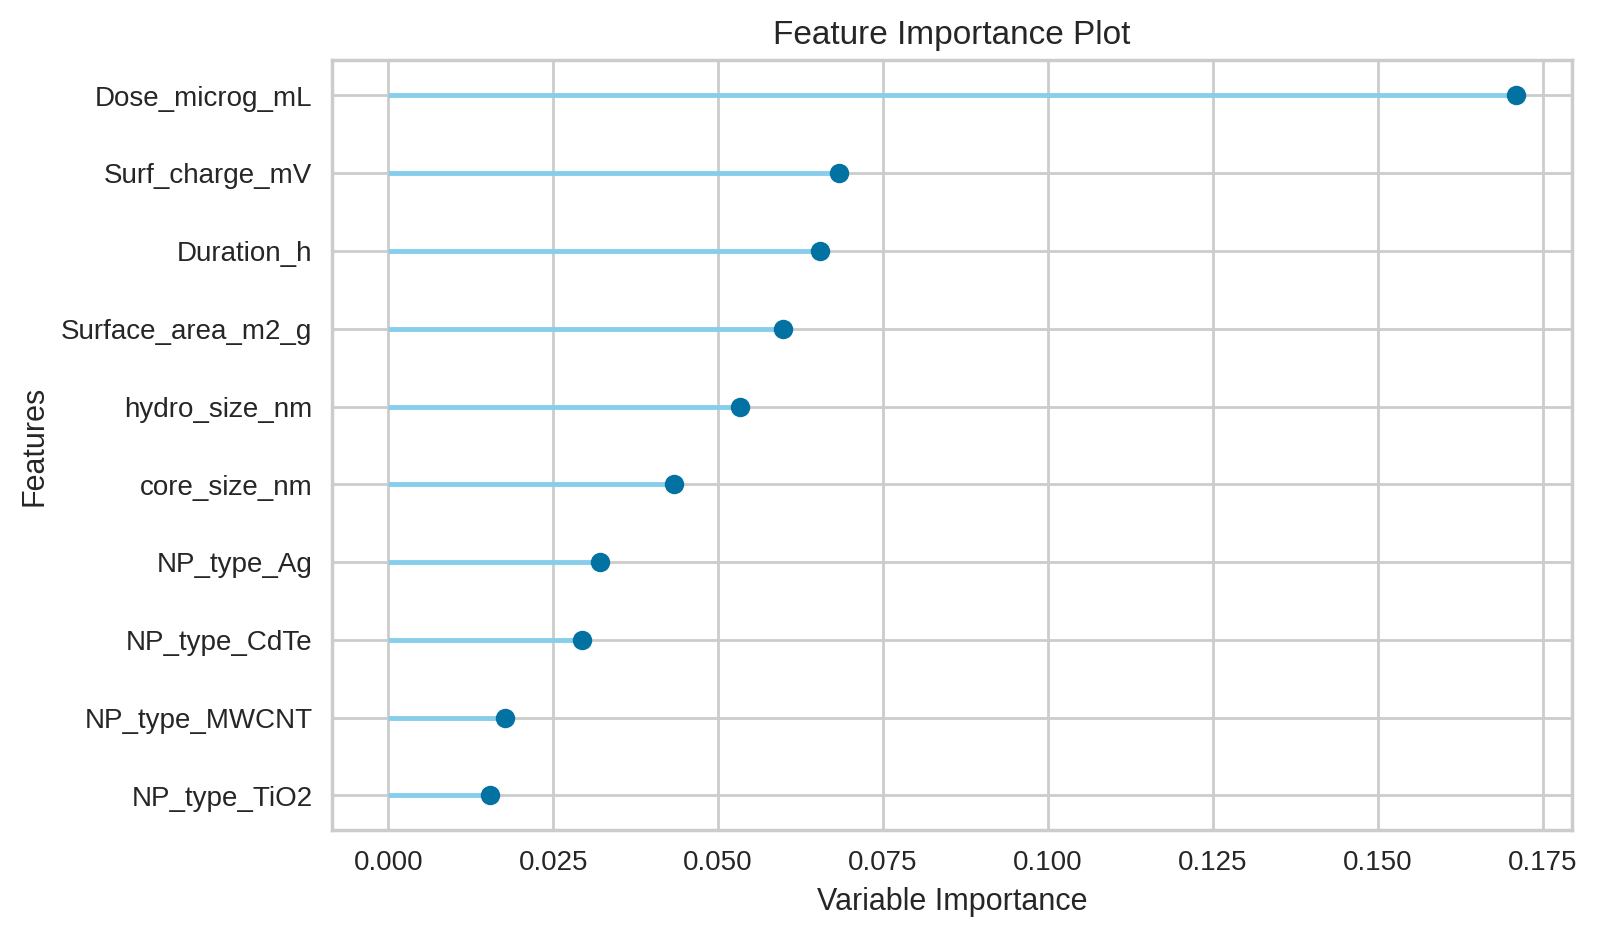

In [66]:
plot_model(best_mdl[0], plot = 'feature')

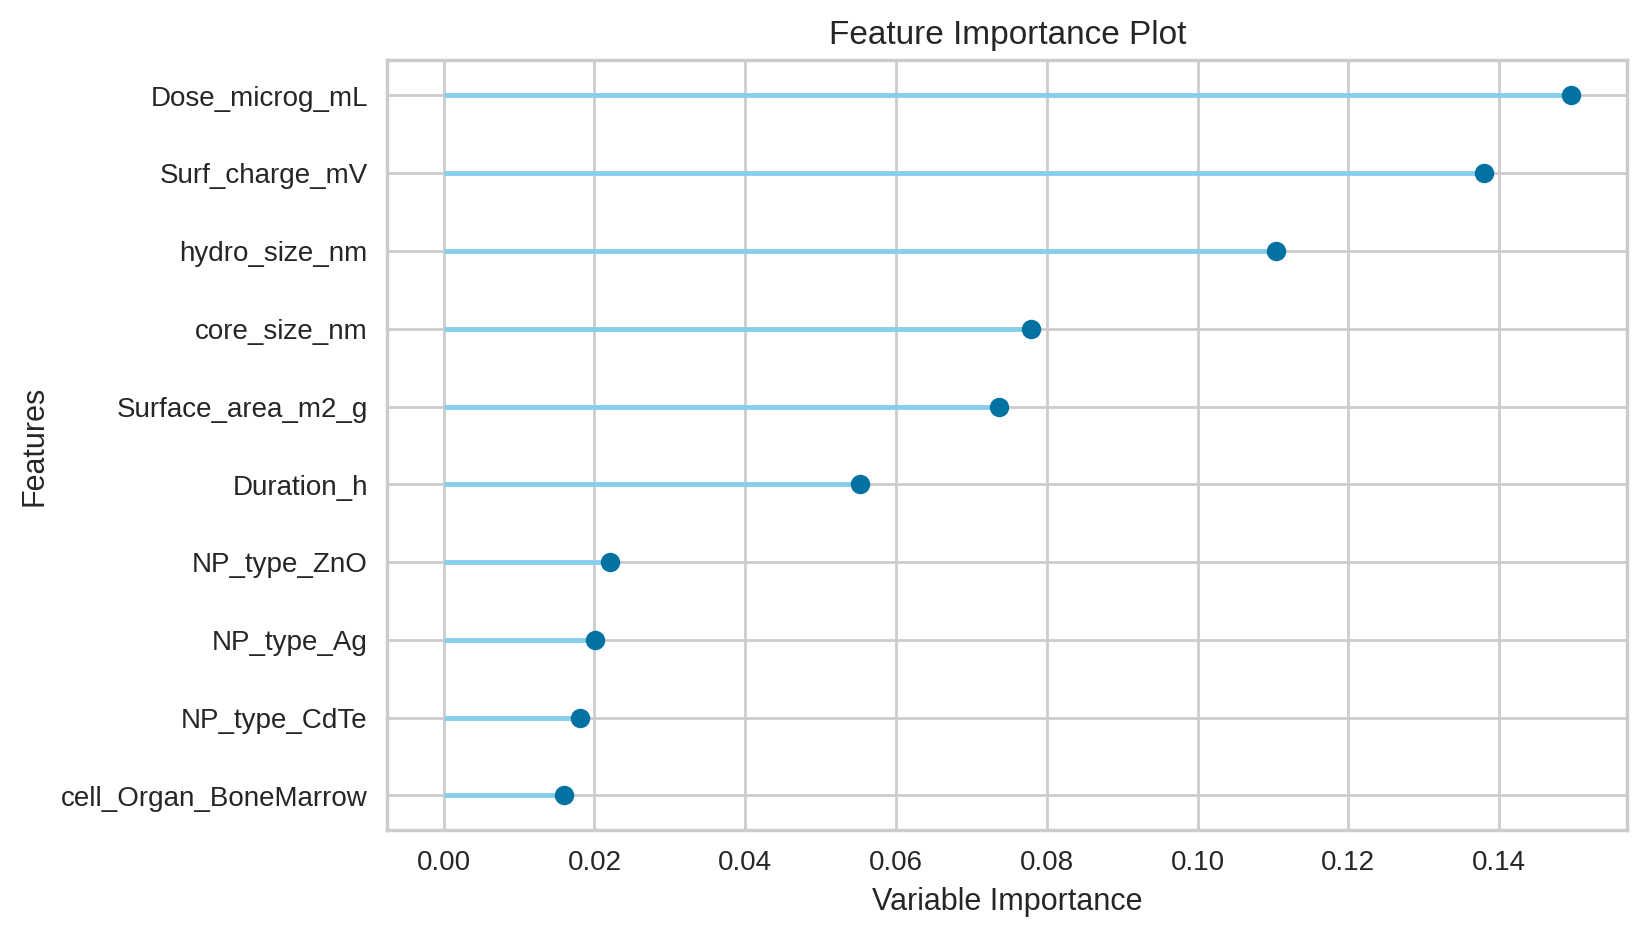

In [67]:
plot_model(best_mdl[1], plot = 'feature')

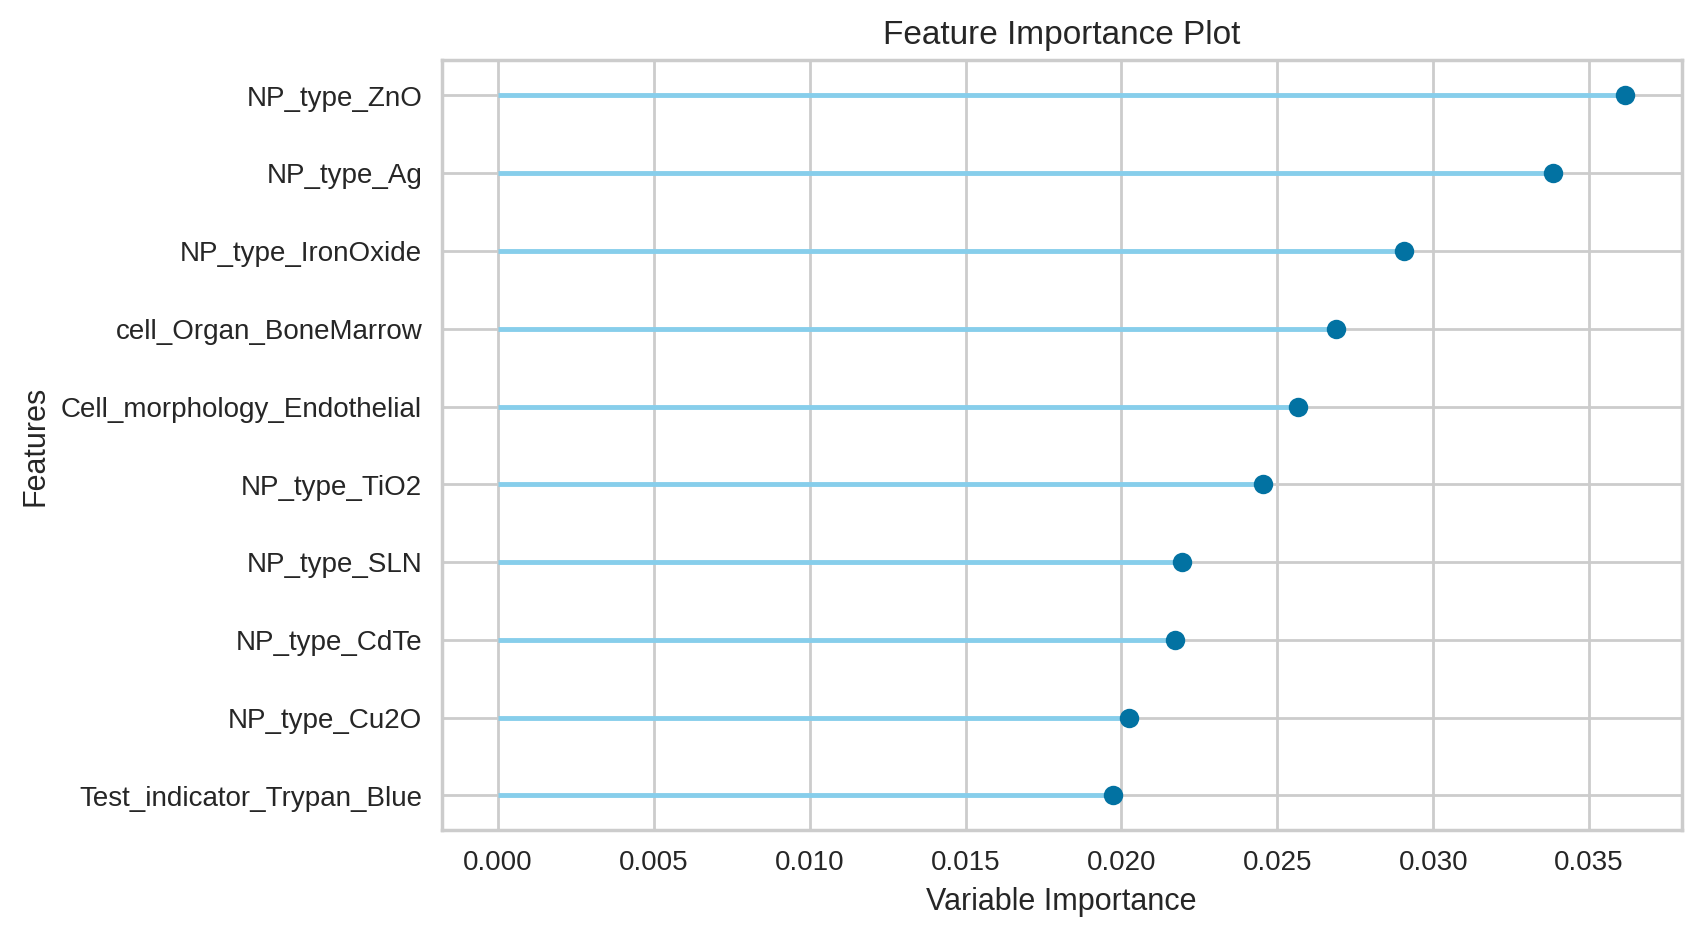

In [68]:
plot_model(best_mdl[2], plot = 'feature')

## Blend the top 3 models using a Voting Regressor 

In [60]:
blend_mdl = blend_models(estimator_list = best_mdl)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.0537,318.8032,17.8551,0.6568,0.5102,0.5634
1,12.5797,334.6284,18.2929,0.6643,0.4969,0.5517
2,12.9059,361.6123,19.0161,0.6357,0.4756,0.5327
3,12.1289,319.1333,17.8643,0.6864,0.5257,2.2293
4,12.1862,385.5938,19.6365,0.6603,0.5387,0.9046
5,12.5558,407.1663,20.1784,0.6441,0.5188,0.6725
6,12.2850,323.4488,17.9847,0.6965,0.5108,0.9160
7,12.1013,363.3328,19.0613,0.6539,0.4860,0.4362
8,13.0480,437.9093,20.9263,0.5687,0.5226,3.5183


In [69]:
save_model(blend_mdl, 'models/universal-model-blended-top3.mdl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_bin=256,
                                 

# Train a model for metal oxide nanomaterials

## Use best scenario 8-3-1

In [32]:
best_scenario = [8 , 3, 1]

In [33]:
sc_ignore_features = features_scenarios[best_scenario[0]-1]["ignore_features"]
sc_bin_numeric_features = features_scenarios[best_scenario[0]-1]["bin_numeric_features"]
sc_high_cardinality_features = features_scenarios[best_scenario[0]-1]["high_cardinality_features"]

print(sc_ignore_features)
print(sc_bin_numeric_features)
print(sc_high_cardinality_features)


sc_imputation_type = imputation_scenarios[best_scenario[1]-1]["imputation_type"]
sc_numeric_imputation = imputation_scenarios[best_scenario[1]-1]["numeric_imputation"]

print(sc_imputation_type)
print(sc_numeric_imputation)

sc_normalize = preprocess_scenarios[best_scenario[2]-1]["normalize"]
sc_remove_outliers = preprocess_scenarios[best_scenario[2]-1]["remove_outliers"]

print(sc_normalize)
print(sc_remove_outliers)

['nanomaterial_group', 'Coating', 'Cell_name']
None
None
iterative
mean
True
True


In [34]:
data_oxide_df = data_df[data_df['nanomaterial_group'] == 'meta_oxide']

In [35]:
data_oxide_df.shape

(4151, 20)

In [36]:
data_oxide_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability,nanomaterial_group
86,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,8.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,101.06,meta_oxide
87,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,16.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,102.73,meta_oxide
88,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,32.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,103.64,meta_oxide
89,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,64.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,106.22,meta_oxide
90,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,128.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,72.99,meta_oxide


In [37]:
stup_mo = setup(data = data_oxide_df, target = 'Viability', 
                    
        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'nanosafety')

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(4151, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2759, 102)"


In [38]:
best_metal_oxide_mdl = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,11.3665,344.4874,18.2581,0.6713,0.4550,1.1314,3.3320
lightgbm,Light Gradient Boosting Machine,11.8428,361.5139,18.7544,0.6555,0.4664,1.0637,0.0450
xgboost,Extreme Gradient Boosting,10.5699,359.4883,18.5562,0.6534,0.4245,0.8915,0.2360
rf,Random Forest Regressor,10.7832,377.6272,19.0220,0.6374,0.4336,1.0978,0.3400
et,Extra Trees Regressor,9.7490,397.3345,19.3153,0.6138,0.4120,0.9341,0.3050
gbr,Gradient Boosting Regressor,16.0390,534.0644,22.9214,0.4888,0.5765,1.5931,0.0890
dt,Decision Tree Regressor,12.1631,540.6018,22.7221,0.4736,0.4856,1.0391,0.0200
knn,K Neighbors Regressor,16.5799,632.1073,25.0496,0.3805,0.5944,2.0132,0.0150
br,Bayesian Ridge,19.6590,753.9911,27.3193,0.2720,0.6514,2.3530,0.0210
ridge,Ridge Regression,19.6312,755.2611,27.3537,0.2695,0.6480,2.3402,0.0150


In [40]:
save_model(best_metal_oxide_mdl, 'models/group-model-metal-oxides-top1-catboost.mdl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                          target='Viability')),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Viability')),
                 ('fix_perfect', Remove_100(target='Viability')),
                 ('clean_names', Clean_Colum_Names()),
      

## Plot feature importance of the metal-oxide group model

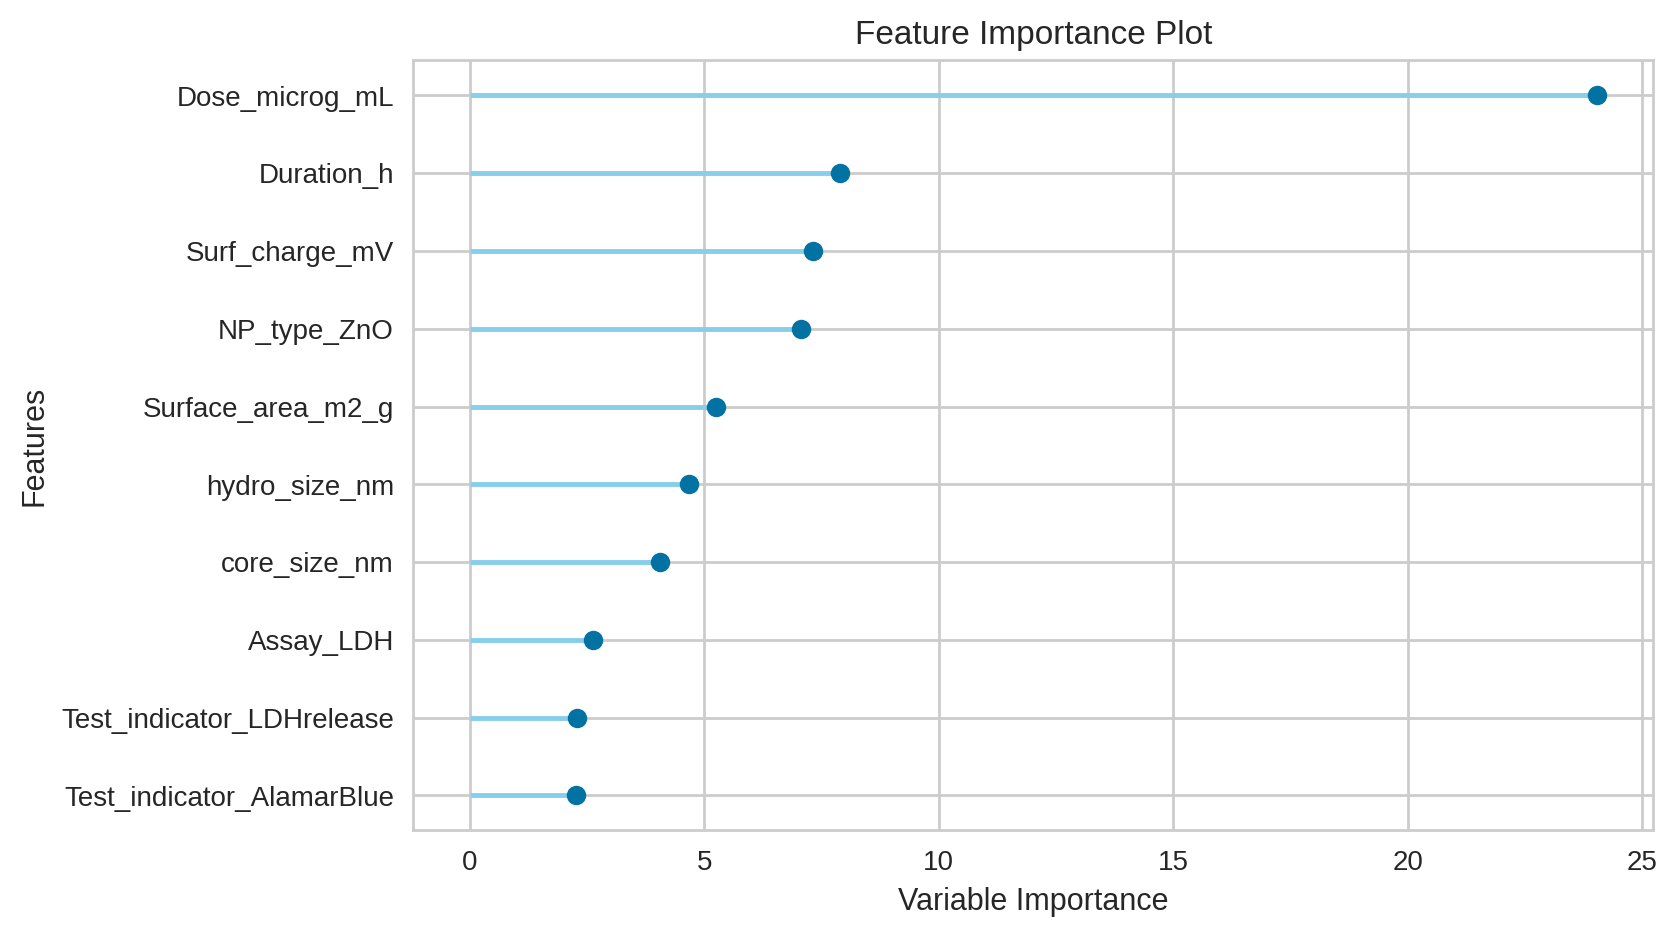

In [42]:
plot_model(best_metal_oxide_mdl, plot = 'feature')

# Train a model for carbon-based nanomaterials

## Use best scenario 8-3-1

In [44]:
best_scenario = [8 , 3, 1]

In [45]:
sc_ignore_features = features_scenarios[best_scenario[0]-1]["ignore_features"]
sc_bin_numeric_features = features_scenarios[best_scenario[0]-1]["bin_numeric_features"]
sc_high_cardinality_features = features_scenarios[best_scenario[0]-1]["high_cardinality_features"]

print(sc_ignore_features)
print(sc_bin_numeric_features)
print(sc_high_cardinality_features)


sc_imputation_type = imputation_scenarios[best_scenario[1]-1]["imputation_type"]
sc_numeric_imputation = imputation_scenarios[best_scenario[1]-1]["numeric_imputation"]

print(sc_imputation_type)
print(sc_numeric_imputation)

sc_normalize = preprocess_scenarios[best_scenario[2]-1]["normalize"]
sc_remove_outliers = preprocess_scenarios[best_scenario[2]-1]["remove_outliers"]

print(sc_normalize)
print(sc_remove_outliers)

['nanomaterial_group', 'Coating', 'Cell_name']
None
None
iterative
mean
True
True


In [46]:
data_carbon_df = data_df[data_df['nanomaterial_group'] == 'carbon']

In [47]:
data_carbon_df.shape

(218, 20)

In [48]:
data_carbon_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability,nanomaterial_group
1965,Diamond,None,4.0,NaN,-35.6,NaN,Sphere,20.0,2.0,C3A,Human,Liver,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,113.14,carbon
1966,Diamond,None,4.0,NaN,-35.6,NaN,Sphere,50.0,2.0,C3A,Human,Liver,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,118.48,carbon
1967,Diamond,None,4.0,NaN,-35.6,NaN,Sphere,100.0,2.0,C3A,Human,Liver,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,113.14,carbon
1968,Diamond,None,4.0,NaN,-35.6,NaN,Sphere,20.0,24.0,C3A,Human,Liver,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,100.85,carbon
1969,Diamond,None,4.0,NaN,-35.6,NaN,Sphere,50.0,24.0,C3A,Human,Liver,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,106.13,carbon


In [49]:
stup_cb = setup(data = data_carbon_df, target = 'Viability', 
                    
        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'nanosafety')

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(218, 20)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(144, 37)"


In [50]:
best_carbon_mdl = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.2621,126.8457,10.9576,0.6407,0.2373,3.8083,0.0580
xgboost,Extreme Gradient Boosting,7.3165,124.3220,10.9209,0.6344,0.2443,5.2341,0.0600
catboost,CatBoost Regressor,8.0533,138.0614,11.4210,0.6045,0.2686,16.6989,1.0720
gbr,Gradient Boosting Regressor,8.8686,174.7517,12.7031,0.5387,0.3040,29.7523,0.0090
rf,Random Forest Regressor,9.0289,172.1022,12.6783,0.5313,0.2941,18.0676,0.0750
dt,Decision Tree Regressor,8.9499,201.7664,13.3247,0.4446,0.2629,3.8405,0.0050
ada,AdaBoost Regressor,12.8589,260.6785,15.8971,0.2510,0.3107,9.7317,0.0160
lightgbm,Light Gradient Boosting Machine,12.0552,275.9918,16.2708,0.2306,0.3518,44.4131,0.0130
knn,K Neighbors Regressor,11.7690,271.5499,16.1757,0.2181,0.3481,39.2429,0.0060
br,Bayesian Ridge,12.0399,294.2047,16.8002,0.2051,0.3620,49.6112,0.0050


In [51]:
save_model(best_carbon_mdl, 'models/group-model-carbon-based-top1-et.mdl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
    

## Plot feature importance of the carbon-based group model

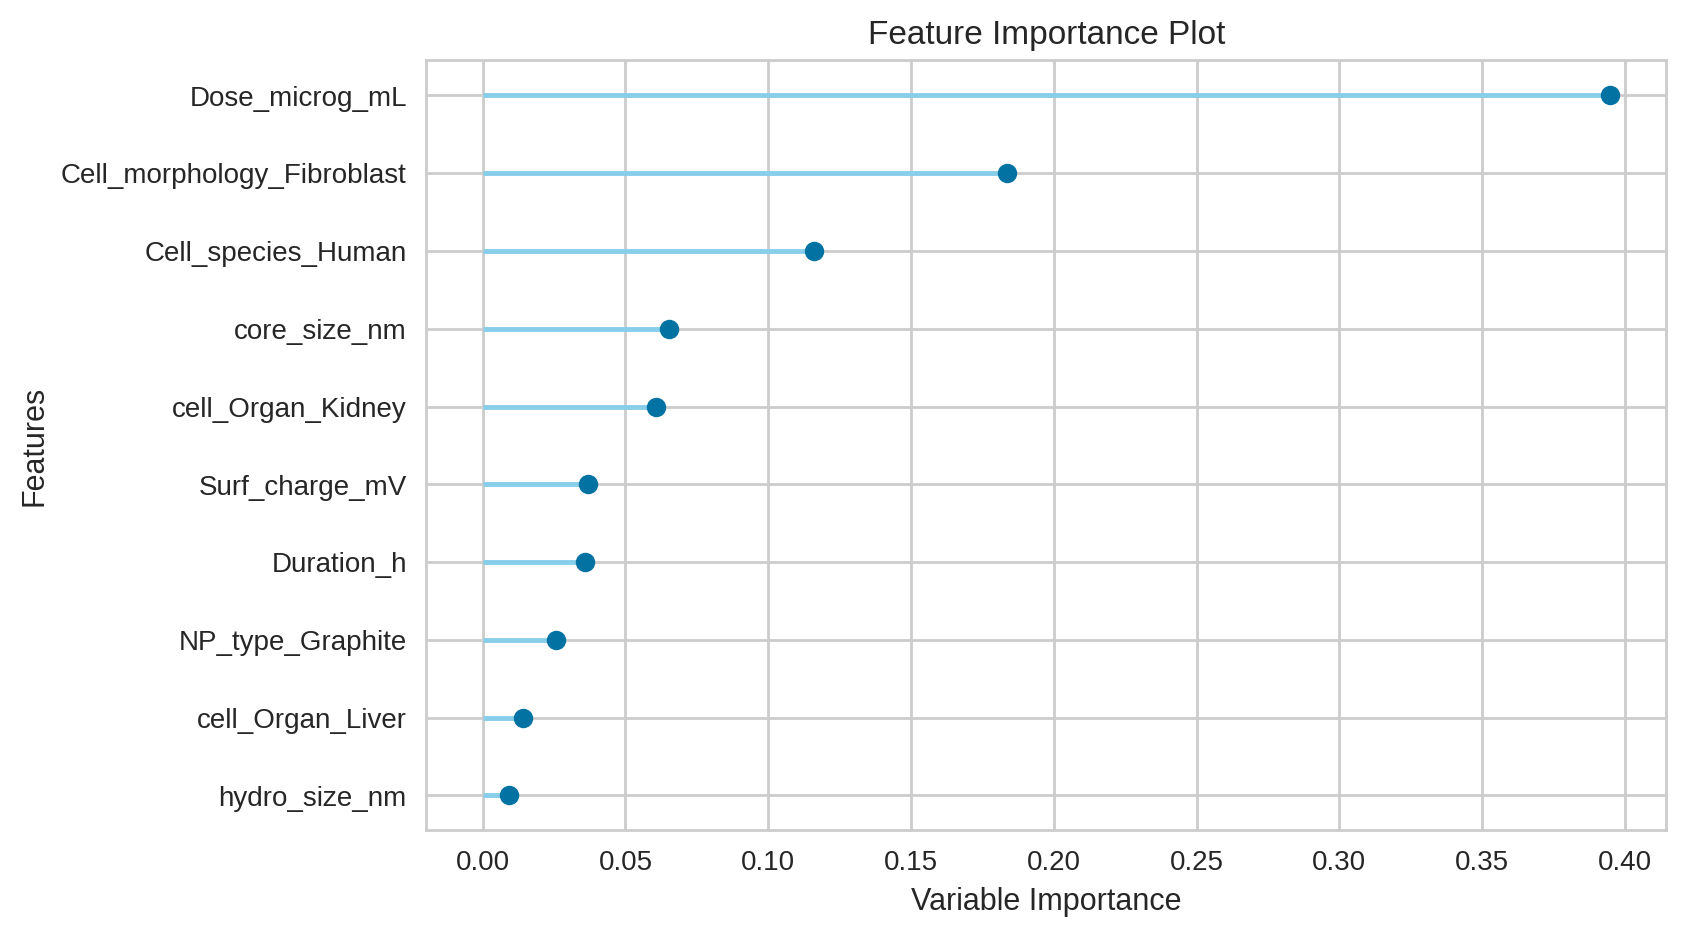

In [53]:
plot_model(best_carbon_mdl, plot = 'feature')